In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

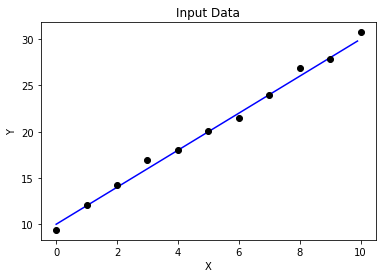

In [2]:
x = np.arange(0,10,0.1)
y = 2*x + 10 # a= 2, b = 10
plt.title('Input Data')
plt.plot(x, y, c= 'b')
# a straight line that is the graph of a linear function (in blue color)

m = np.arange(0,11,1) # m = 11
noise = []

for i in m:
    noise.append(2*i +10 + random.uniform(-1,1))

plt.plot(m, noise, 'ro', c = 'k')
#a set of points that have random perturbations with respect to the straight line (in black color)

plt.ylabel('Y')
plt.xlabel('X')
plt.show()